### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [7]:
data = pd.read_csv('data/coupons.csv')

In [8]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [10]:
missing_data_summary = data.isnull().sum()
missing_data_percentage = (data.isnull().sum() / len(data)) * 100
missing_data_percentage

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

3. Decide what to do about your missing data -- drop, replace, other...

In [11]:

data_cleaned = data.drop(columns=['car'])


In [13]:

columns_to_fill = ['CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar']
data_cleaned[columns_to_fill] = data_cleaned[columns_to_fill].fillna('Unknown')


remaining_missing_values = data_cleaned.isnull().sum()
print(remaining_missing_values)


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon? 



In [14]:
total_observations = len(data_cleaned)
accepted_coupons = data_cleaned[data_cleaned['Y'] == 1].shape[0]
acceptance_rate = accepted_coupons / total_observations
print(f"Acceptance Rate: {acceptance_rate:.2%}")


Acceptance Rate: 56.84%


5. Use a bar plot to visualize the `coupon` column.

In [15]:
coupon_distribution = data_cleaned['coupon'].value_counts()
print(coupon_distribution)


coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


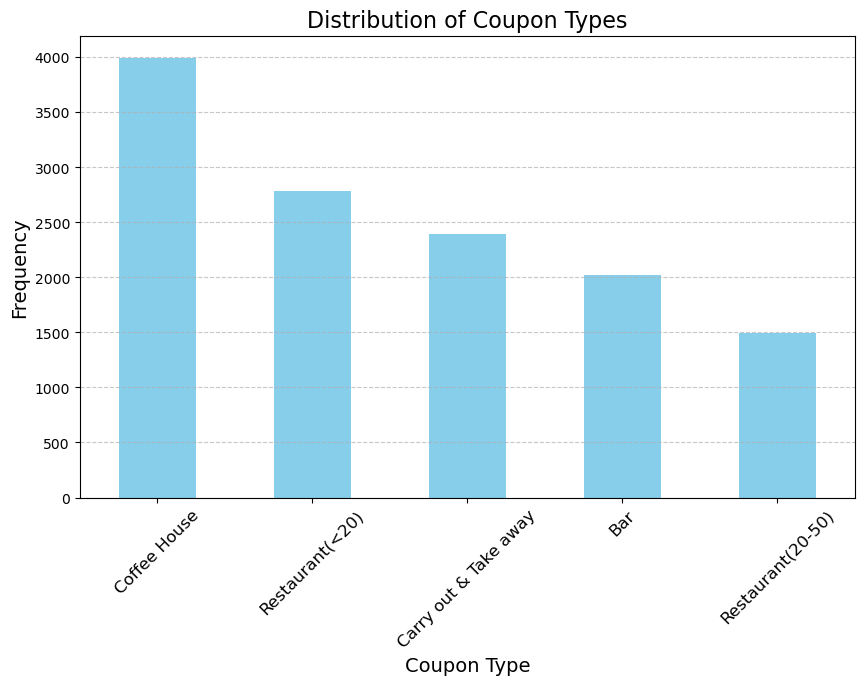

In [16]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
coupon_distribution.plot(kind='bar', color='skyblue')
plt.title("Distribution of Coupon Types", fontsize=16)
plt.xlabel("Coupon Type", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


6. Use a histogram to visualize the temperature column.

In [17]:

print(data_cleaned['temperature'].unique())


[55 80 30]


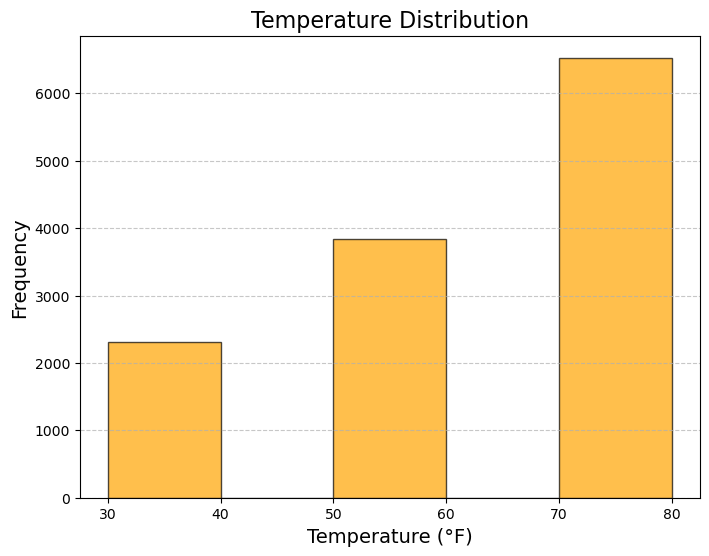

In [18]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.hist(data_cleaned['temperature'], bins=5, color='orange', edgecolor='black', alpha=0.7)
plt.title("Temperature Distribution", fontsize=16)
plt.xlabel("Temperature (°F)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [21]:

bar_coupons_df = data_cleaned[data_cleaned['coupon'] == 'Bar']

print(bar_coupons_df.shape)  
print(bar_coupons_df.head())  


(2017, 25)
        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9   Female  21  Unmarried partner  ...        never   Unknown   
13  Female  21  Unmarried partner  ...        never   Unknown   
17  Female  21  Unmarried partner  ...        never   Unknown   
24    Male  21             Single  ...        less1       4~8   
35    Male  21             Single  ...        less1       4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
9                   4~8              1~3    

2. What proportion of bar coupons were accepted?


In [22]:

total_bar_coupons = len(bar_coupons_df)


accepted_bar_coupons = bar_coupons_df[bar_coupons_df['Y'] == 1].shape[0]


bar_acceptance_rate = accepted_bar_coupons / total_bar_coupons
print(f"Proportion of bar coupons accepted: {bar_acceptance_rate:.2%}")


Proportion of bar coupons accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [23]:

low_bar_visits = bar_coupons_df[bar_coupons_df['Bar'].isin(['never', '<1', '1~3'])]

high_bar_visits = bar_coupons_df[bar_coupons_df['Bar'].isin(['4~8', '>8'])]


low_acceptance_rate = low_bar_visits[low_bar_visits['Y'] == 1].shape[0] / low_bar_visits.shape[0]

high_acceptance_rate = high_bar_visits[high_bar_visits['Y'] == 1].shape[0] / high_bar_visits.shape[0]

print(f"Acceptance Rate (<=3 visits): {low_acceptance_rate:.2%}")
print(f"Acceptance Rate (>3 visits): {high_acceptance_rate:.2%}")


Acceptance Rate (<=3 visits): 33.66%
Acceptance Rate (>3 visits): 78.00%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [24]:

bar_coupons_df['age'] = pd.to_numeric(bar_coupons_df['age'], errors='coerce')

group_1 = bar_coupons_df[(bar_coupons_df['Bar'].isin(['4~8', '>8'])) & (bar_coupons_df['age'] > 25)]

group_2 = bar_coupons_df[~((bar_coupons_df['Bar'].isin(['4~8', '>8'])) & (bar_coupons_df['age'] > 25))]


In [25]:

group_1_acceptance_rate = group_1[group_1['Y'] == 1].shape[0] / group_1.shape[0]


group_2_acceptance_rate = group_2[group_2['Y'] == 1].shape[0] / group_2.shape[0]

print(f"Acceptance Rate (Group 1 - >1 visit/month & age > 25): {group_1_acceptance_rate:.2%}")
print(f"Acceptance Rate (Group 2 - All others): {group_2_acceptance_rate:.2%}")


Acceptance Rate (Group 1 - >1 visit/month & age > 25): 80.85%
Acceptance Rate (Group 2 - All others): 39.05%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [26]:

group_1 = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(['4~8', '>8'])) &
    (bar_coupons_df['passanger'] != 'Kid(s)') &
    (bar_coupons_df['occupation'] != 'Farming, Fishing, Forestry')
]


group_2 = bar_coupons_df[
    ~(
        (bar_coupons_df['Bar'].isin(['4~8', '>8'])) &
        (bar_coupons_df['passanger'] != 'Kid(s)') &
        (bar_coupons_df['occupation'] != 'Farming, Fishing, Forestry')
    )
]


In [27]:

group_1_acceptance_rate = group_1[group_1['Y'] == 1].shape[0] / group_1.shape[0]


group_2_acceptance_rate = group_2[group_2['Y'] == 1].shape[0] / group_2.shape[0]

print(f"Acceptance Rate (Group 1): {group_1_acceptance_rate:.2%}")
print(f"Acceptance Rate (Group 2): {group_2_acceptance_rate:.2%}")


Acceptance Rate (Group 1): 79.02%
Acceptance Rate (Group 2): 38.10%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [28]:

group_1 = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(['4~8', '>8'])) &
    (bar_coupons_df['passanger'] != 'Kid(s)') &
    (bar_coupons_df['maritalStatus'] != 'Widowed')
]


group_2 = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(['4~8', '>8'])) &
    (bar_coupons_df['age'] < 30)
]

group_3 = bar_coupons_df[
    (bar_coupons_df['RestaurantLessThan20'] == '>8') &
    (bar_coupons_df['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
]


In [29]:

group_1_acceptance_rate = group_1[group_1['Y'] == 1].shape[0] / group_1.shape[0] if group_1.shape[0] > 0 else 0


group_2_acceptance_rate = group_2[group_2['Y'] == 1].shape[0] / group_2.shape[0] if group_2.shape[0] > 0 else 0


group_3_acceptance_rate = group_3[group_3['Y'] == 1].shape[0] / group_3.shape[0] if group_3.shape[0] > 0 else 0

print(f"Acceptance Rate (Group 1): {group_1_acceptance_rate:.2%}")
print(f"Acceptance Rate (Group 2): {group_2_acceptance_rate:.2%}")
print(f"Acceptance Rate (Group 3): {group_3_acceptance_rate:.2%}")


Acceptance Rate (Group 1): 79.02%
Acceptance Rate (Group 2): 80.81%
Acceptance Rate (Group 3): 0.00%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations:

Group 1 (79.02%): Drivers who frequent bars, have non-child passengers, and are not widowed are more likely to accept bar coupons, indicating social preferences or familiarity with bars.

Group 2 (80.81%): Younger drivers (<30 years) who frequent bars show the highest acceptance rate, likely due to openness to new experiences or a preference for nightlife.

Group 3 (0.00%): Drivers with lower income and frequenting cheap restaurants show no interest in bar coupons, possibly prioritizing essential spending over leisure activities.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [30]:
coffee_coupons_df = data_cleaned[data_cleaned['coupon'] == 'Coffee House']


In [31]:
acceptance_rate = coffee_coupons_df[coffee_coupons_df['Y'] == 1].shape[0] / coffee_coupons_df.shape[0]
print(f"Acceptance Rate for Coffee Coupons: {acceptance_rate:.2%}")


Acceptance Rate for Coffee Coupons: 49.92%


In [32]:
morning_acceptance = coffee_coupons_df[
    (coffee_coupons_df['time'] == '10AM') & (coffee_coupons_df['Y'] == 1)
].shape[0] / coffee_coupons_df[coffee_coupons_df['time'] == '10AM'].shape[0]

print(f"Morning Acceptance Rate: {morning_acceptance:.2%}")


Morning Acceptance Rate: 64.07%



The acceptance rate for coffee house coupons is 49.92%, indicating that approximately half of the surveyed participants accept such coupons. This highlights moderate interest in coffee coupons.

When analyzing the acceptance rate during the morning (10 AM), the rate increases to 64.07%, suggesting a strong association between coffee consumption and morning routines. Targeting users at this time can improve coupon acceptance.

Coffee coupons are most effective in the morning, and promotional efforts should focus on this time period to maximize engagement. Further analysis by passenger type, income, or weather could provide deeper insights.